# Techworks Final Project
### By Jatin Kharbanda

#### Importing Libraries

In [545]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree, ensemble
from xgboost import XGBRegressor
from IPython.display import Image
import pydotplus
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

#### Data Importing and Preprocessing

In [192]:
df = pd.read_csv('ML case Study.csv') # Main Dataframe
colleges = pd.read_csv('Colleges.csv') # College Tier Detials
cities = pd.read_csv('cities.csv') # Metro & Non Metro Cities Detials

In [193]:
df.info() # To check the missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


##### There are no missing values so now we need to do one hot encoding.

In [194]:
df.head() # To check the data

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [195]:
colleges.head() # To check the data

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [196]:
cities.head() # To check the data

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [197]:
# college dataframe to list conversion
Tier1 = colleges['Tier 1'].tolist()
Tier2 = colleges['Tier 2'].tolist()
Tier3 = colleges['Tier 3'].tolist()

In [198]:
# One Hot Encoding for the college column
for item in df.College:
    if item in Tier1:
        df['College'].replace(item,1,inplace=True)
    elif item in Tier2:
        df['College'].replace(item,2,inplace=True)
    elif item in Tier3:
        df['College'].replace(item,3,inplace=True)

In [199]:
# city dataframe to list conversion
metro_cities = cities['Metrio City'].tolist()
non_metro_cities = cities['non-metro cities'].tolist()

In [200]:
# One Hot Encoding for the city column
for item in df.City:
    if item in metro_cities:
        df['City'].replace(item,1,inplace=True)
    elif item in non_metro_cities:
        df['City'].replace(item,0,inplace=True)

In [201]:
# Checking coloums for dummies creation
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10


In [202]:
# getting dummiers for the Role column
df = pd.get_dummies(df,columns=['Role'],drop_first=True)

In [203]:
# Checking data for the last time
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,1
1,2,0,57081.0,1,84,18,68005.87,0
2,3,0,60347.0,2,52,28,76764.02,0
3,3,0,49010.0,2,81,33,82092.39,0
4,1,0,57879.0,4,74,32,73878.10,0


In [204]:
# Checking Correlation
df.corr()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,-0.014946,0.041979,-0.055060,0.003539,0.011752,-0.029592,-0.014749
City,-0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,-0.048671
Previous CTC,0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,-0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,-0.029592,-0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,-0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


#### Checking for outliers

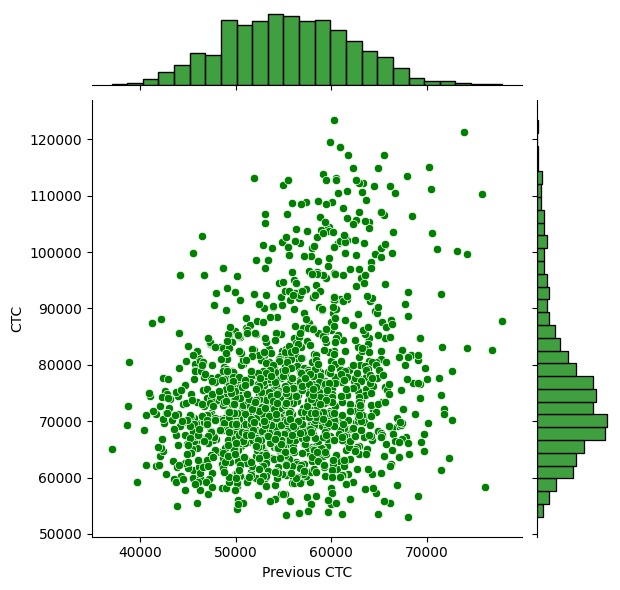

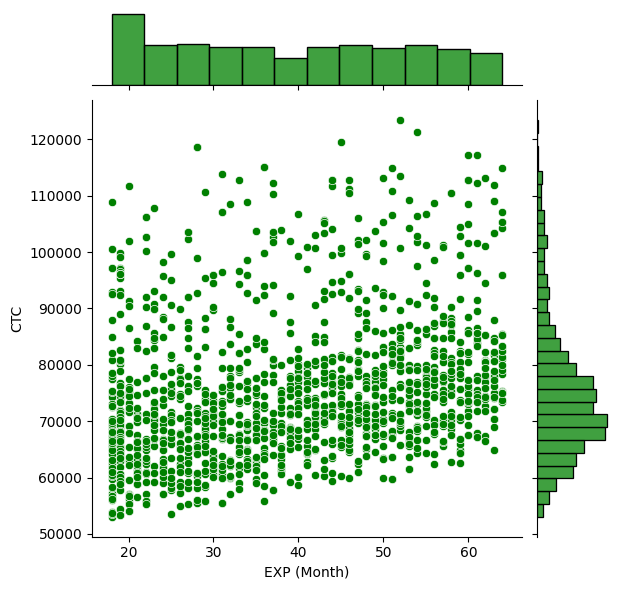

In [205]:
# Plottting Jointplots to check outliers
sns.jointplot(x=df['Previous CTC'], y=df['CTC'], color='green')
sns.jointplot(x=df['EXP (Month)'], y=df['CTC'], color='green')

##### Data Splitting

In [251]:
# Creating Variables
X = df.drop('CTC', axis=1)
y = df['CTC']

##### Train Test Split

In [494]:
#Data splitted with test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2) 

In [208]:
#Checking Shape of all varaibles
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1271, 7), (318, 7), (1271,), (318,))

#### Models preparation

##### 1. Linear Regression

Coefficients:  [-2.86601466e+02 -1.43780679e+02  3.70206122e-01  3.08146506e+02
  2.16934673e-01  2.59738205e+02  1.87565315e+04]
Intercept:  40611.69397182769


Training Data Analysis: 
Mean squared error:  72699756.50719483
R2_score:  0.5132577675406905


Test Data Analysis: 
Mean squared error:  79321070.53930828
R2_score:  0.5904898241615147


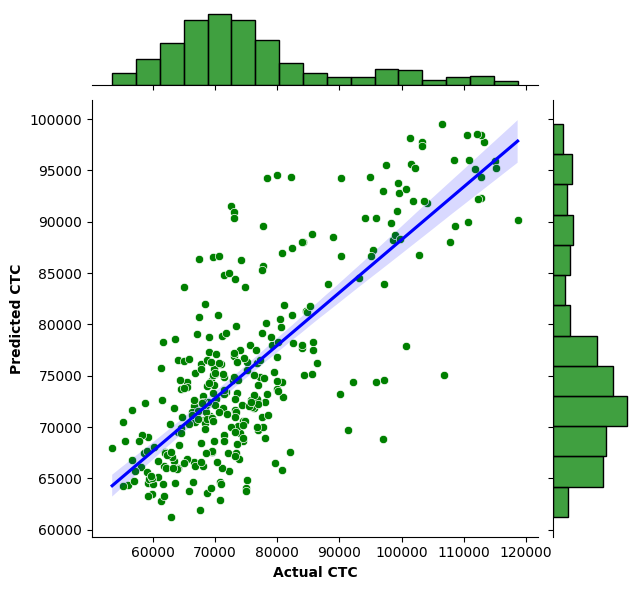

In [511]:
lr = LinearRegression() # Created instance of LinearRegression model
lr.fit (X_train, y_train) # Fit model tp training set

lr_coef = lr.coef_   # Coefficients for linear regression model
lr_intercept = lr.intercept_ # Intercept for linear regression model
lr_mean_squared_error_train =  mean_squared_error(y_train, lr.predict(X_train)) # mean squared error of training set
lr_r2score_train = r2_score(y_train, lr.predict(X_train)) # r2 score of training set
lr_mean_squared_error_test = mean_squared_error(y_test, lr.predict(X_test)) # mean squared error of test set
lr_r2score_test = r2_score(y_test, lr.predict(X_test)) # r2 score of test set

# printing all variables
print("Coefficients: ", lr_coef) 
print("Intercept: ", lr_intercept)
print("\n\nTraining Data Analysis: ")
print("Mean squared error: ", lr_mean_squared_error_train)
print("R2_score: ", lr_r2score_train)
print("\n\nTest Data Analysis: ")
print("Mean squared error: ", lr_mean_squared_error_test)
print("R2_score: ", lr_r2score_test)


graph = sns.jointplot(x=y_test, y=lr.predict(X_test), color='green') # crearted graph of actual ctc and predicted ctc
graph.plot_joint(sns.regplot, color='Blue', scatter=False) # linear line plot
graph.set_axis_labels('Actual CTC', 'Predicted CTC', fontweight='bold') # set labels for both axis

##### 2. Ridge Regression

Coefficients:  [-2.40934245e+02 -7.20486215e+01  2.43060994e+03  3.44764202e+02
  3.20230346e+00  3.68231792e+03  7.51704286e+03]
Intercept:  75189.54450826121


Training Data Analysis: 
Mean squared error:  72699794.69364625
R2_score:  0.5132575118732783


Test Data Analysis: 
Mean squared error:  79341814.2639457
R2_score:  0.5903827307213222


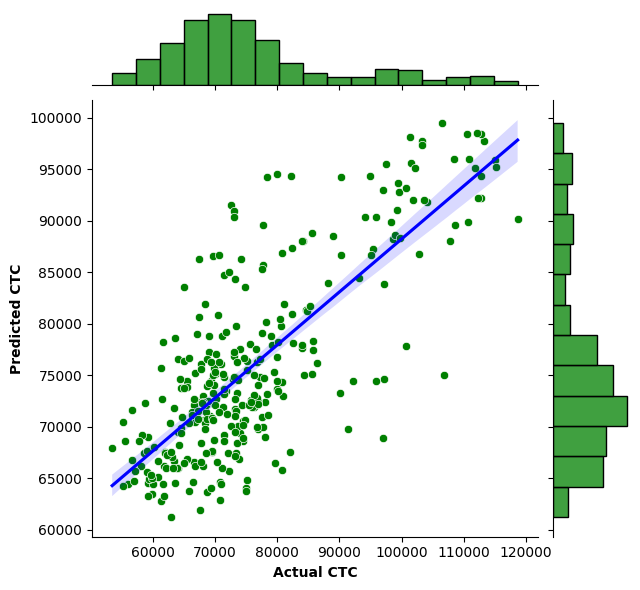

In [513]:
scaler = StandardScaler().fit(X_train) # scaler object to perform transformation

x_test_s = scaler.transform(X_test) # data transformation
x_train_s=scaler.transform(X_train) # data transformation

lr_r=Ridge(alpha=.9) # create ridge regression model instance
lr_r.fit(x_train_s,y_train) # fitting data to model

lr_r_coef = lr_r.coef_   # Coefficients for linear regression model
lr_r_intercept = lr_r.intercept_ # Intercept for linear regression model
lr_r_mean_squared_error_train =  mean_squared_error(y_train, lr_r.predict(x_train_s)) # mean squared error of training set
lr_r_r2score_train = r2_score(y_train, lr_r.predict(x_train_s)) # r2 score of training set
lr_r_mean_squared_error_test = mean_squared_error(y_test, lr_r.predict(x_test_s)) # mean squared error of test set
lr_r_r2score_test = r2_score(y_test, lr_r.predict(x_test_s)) # r2 score of test set

# printing all variables
print("Coefficients: ", lr_r_coef) 
print("Intercept: ", lr_r_intercept)
print("\n\nTraining Data Analysis: ")
print("Mean squared error: ", lr_r_mean_squared_error_train)
print("R2_score: ", lr_r_r2score_train)
print("\n\nTest Data Analysis: ")
print("Mean squared error: ", lr_r_mean_squared_error_test)
print("R2_score: ", lr_r_r2score_test)

graph = sns.jointplot(x=y_test, y=lr_r.predict(x_test_s), color='green') # crearted graph of actual ctc and predicted ctc
graph.plot_joint(sns.regplot, color='Blue', scatter=False) # linear line plot
graph.set_axis_labels('Actual CTC', 'Predicted CTC', fontweight='bold') # set labels for both axis

##### Trying multiple values of hyperparameters using validation curve

Best Parameter:  [13.53047775]

Training Data Analysis: 
Mean squared error:  78747784.08752742
R2_score:  0.4727647784598368

Test Data Analysis: 
Mean squared error:  72159926.46423297
R2_score:  0.6274605981242232


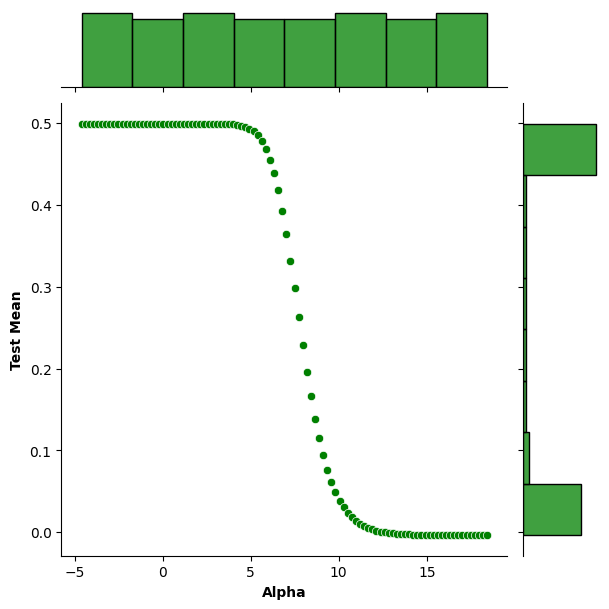

In [514]:
param_range = np.logspace(-2,8,100) # range of hyperparameters

# calcualting validating curve
train_scores, test_scores = validation_curve(Ridge(),
                                             X = x_train_s,
                                             y= y_train,
                                             param_name= "alpha",
                                             param_range= param_range,
                                             scoring='r2') 

# calculating mean for test and training scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# graph for validation curve
g = sns.jointplot(x=np.log(param_range), y=test_mean, color='Green')
g.set_axis_labels('Alpha','Test Mean', fontweight='bold')

# finding the best parameter
best_param = np.where(test_mean == max(test_mean))

# crating a best model with the best parameter
lr_r_best = Ridge(alpha=param_range[best_param])
lr_r_best.fit(x_test_s, y_test)

# creating variables for analysis
lr_r_best_mse_train = mean_squared_error(y_train, lr_r_best.predict(x_train_s))
lr_r_best_r2_train = r2_score(y_train, lr_r_best.predict(x_train_s))
lr_r_best_mse_test = mean_squared_error(y_test, lr_r_best.predict(x_test_s))
lr_r_best_r2_test = r2_score(y_test, lr_r_best.predict(x_test_s))

# printing the results for analysis
print("Best Parameter: " , param_range[best_param])
print("\nTraining Data Analysis: ")
print("Mean squared error: ", lr_r_best_mse_train)
print("R2_score: ", lr_r_best_r2_train)
print("\nTest Data Analysis: ")
print("Mean squared error: ", lr_r_best_mse_test)
print("R2_score: ", lr_r_best_r2_test)


##### 3. Lasso Regression

Best Parameter:  [138.48863714]

Training Data Analysis: 
Mean squared error:  78525084.59354544
R2_score:  0.4742558047586336

Test Data Analysis: 
Mean squared error:  72134653.30951752
R2_score:  0.6275910756122494


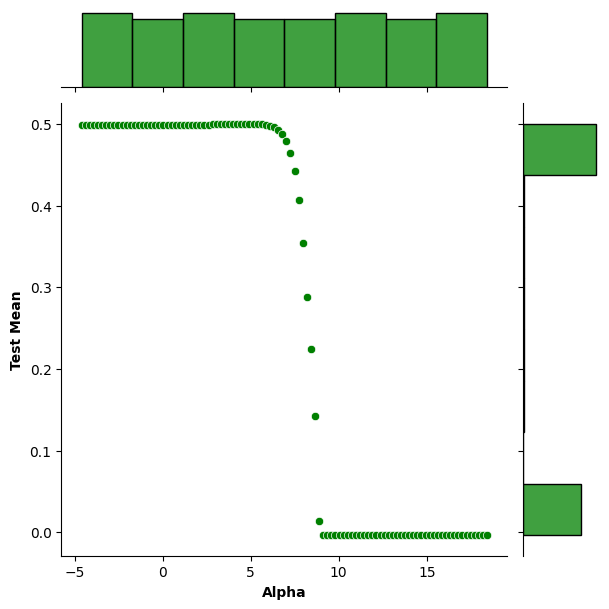

In [517]:
# calcualting validating curve
train_scores_l, test_scores_l = validation_curve(Lasso(),
                                                 X = x_train_s,
                                                 y= y_train,
                                                 param_name= "alpha",
                                                 param_range= param_range,
                                                 scoring='r2')

# calculating mean for test and training scores
train_mean_lasso = np.mean(train_scores_l, axis=1)
test_mean_lasso = np.mean(test_scores_l, axis=1)

# graph for validation curve
g = sns.jointplot(x=np.log(param_range), y=test_mean_lasso, color='Green')
g.set_axis_labels('Alpha','Test Mean', fontweight='bold')

# finding the best parameter
best_param_lasso = np.where(test_mean_lasso == max(test_mean_lasso))

# crating a best model with the best parameter
lr_lasso = Lasso(alpha=float(param_range[best_param_lasso]))
lr_lasso.fit(x_test_s, y_test)

# creating variables for analysis
lr_l_mse_train = mean_squared_error(y_train, lr_lasso.predict(x_train_s))
lr_l_r2_train = r2_score(y_train, lr_lasso.predict(x_train_s))
lr_l_mse_test = mean_squared_error(y_test, lr_lasso.predict(x_test_s))
lr_l_r2_test = r2_score(y_test, lr_lasso.predict(x_test_s))

# printing the results for analysis
print("Best Parameter: " , param_range[best_param_lasso])
print("\nTraining Data Analysis: ")
print("Mean squared error: ", lr_l_mse_train)
print("R2_score: ", lr_l_r2_train)
print("\nTest Data Analysis: ")
print("Mean squared error: ", lr_l_mse_test)
print("R2_score: ", lr_l_r2_test)

##### 4. Decision Tree

Training Data Analysis: 
Mean squared error:  61180858.65310838
R2_score:  0.5903795396942728

Test Data Analysis: 
Mean squared error:  61188616.15877513
R2_score:  0.6841020829380237


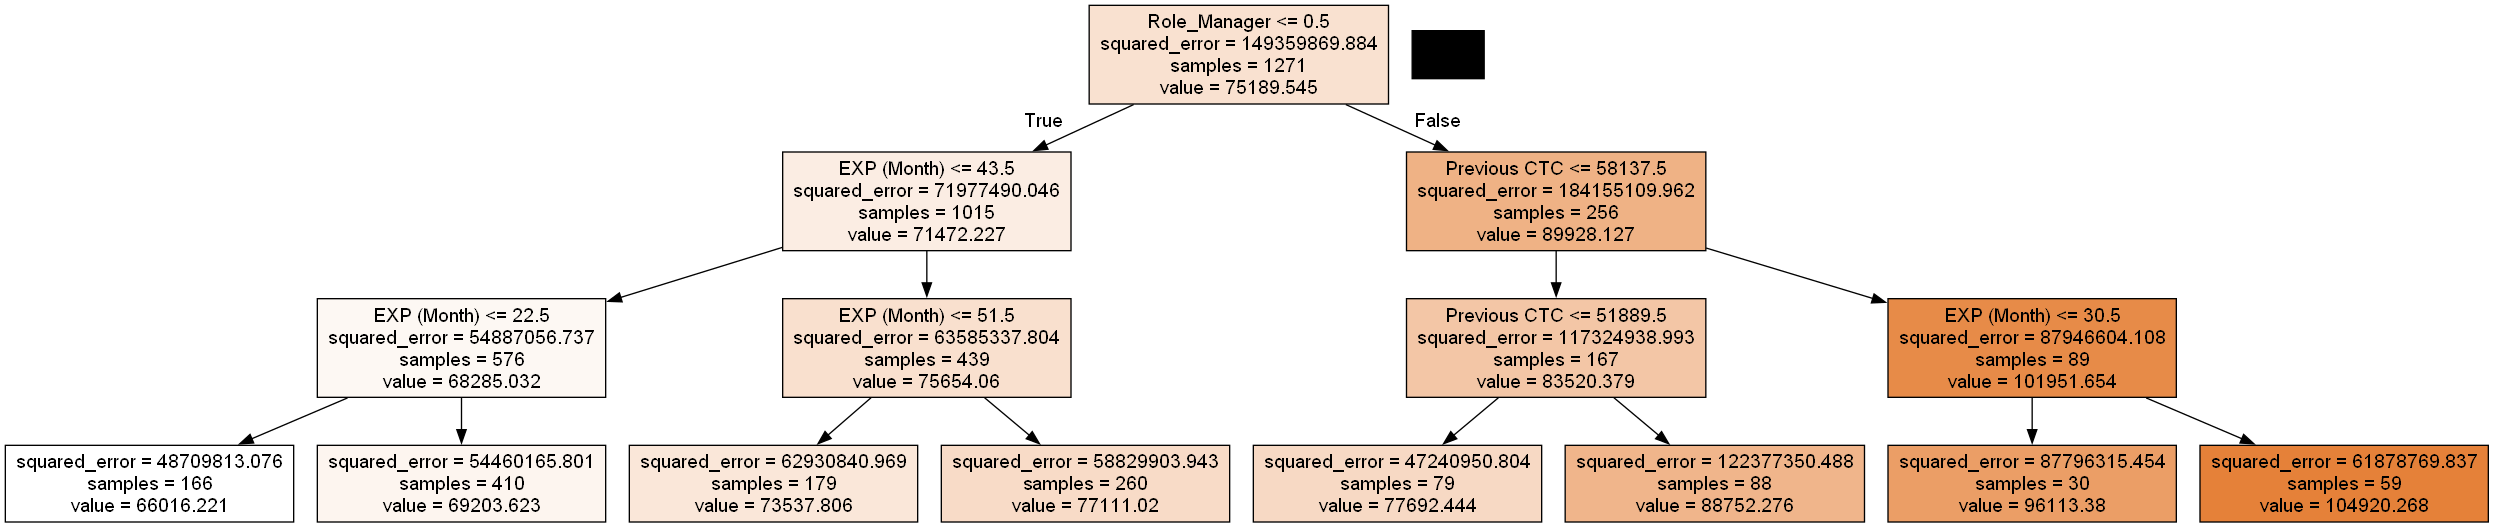

In [525]:
regtree = tree.DecisionTreeRegressor(max_depth=3) # Decision Tree model
regtree.fit(X_train, y_train) # fitting training data to model

# creating variables for analysis
regtree_mse_train = mean_squared_error(y_train, regtree.predict(X_train))
regtree_r2_train = r2_score(y_train, regtree.predict(X_train))
regtree_mse_test = mean_squared_error(y_test, regtree.predict(X_test))
regtree_r2_test = r2_score(y_test, regtree.predict(X_test))

# printing the results for analysis
print("Training Data Analysis: ")
print("Mean squared error: ", regtree_mse_train)
print("R2_score: ", regtree_r2_train)
print("\nTest Data Analysis: ")
print("Mean squared error: ", regtree_mse_test)
print("R2_score: ", regtree_r2_test)

# graph of tree
dot_data = tree.export_graphviz(regtree,feature_names=X_train.columns,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

##### 5. Random Forest

In [520]:
rf = ensemble.RandomForestRegressor(n_estimators=1000, n_jobs=-1) # Random Forest model
rf.fit(X_train, y_train) # fitting training data to model

# creating variables for analysis
rf_mse_train = mean_squared_error(y_train, rf.predict(X_train))
rf_r2_train = r2_score(y_train, rf.predict(X_train))
rf_mse_test = mean_squared_error(y_test, rf.predict(X_test))
rf_r2_test = r2_score(y_test, rf.predict(X_test))

# printing the results for analysis
print("Training Data Analysis: ")
print("Mean squared error: ", rf_mse_train)
print("R2_score: ", rf_r2_train)
print("\nTest Data Analysis: ")
print("Mean squared error: ", rf_mse_test)
print("R2_score: ", rf_r2_test)

Training Data Analysis: 
Mean squared error:  8099486.572647971
R2_score:  0.9457720030223937

Test Data Analysis: 
Mean squared error:  48363423.54306571
R2_score:  0.7503145892432543


In [521]:
# dictonery for paramters with different ranges
param_grid = {'n_estimators' : [250,500,1000,1500,2000],
              'max_features' : [2,4,6],
              'min_samples_split' : [2,3,5,7,10]} 

grid_search = GridSearchCV(rf,param_grid, n_jobs=-1, cv=5, scoring='r2')
grid_search.fit(X_train,y_train) # fitting training data to model

cvrf = grid_search.best_estimator_

# creating variables for analysis
cvrf_mse_train = mean_squared_error(y_train, cvrf.predict(X_train))
cvrf_r2_train = r2_score(y_train, cvrf.predict(X_train))
cvrf_mse_test = mean_squared_error(y_test, cvrf.predict(X_test))
cvrf_r2_test = r2_score(y_test, cvrf.predict(X_test))

# printing the results for analysis
print("Best Parameters: ", grid_search.best_params_)
print("\nTraining Data Analysis: ")
print("Mean squared error: ", cvrf_mse_train)
print("R2_score: ", cvrf_r2_train)
print("\nTest Data Analysis: ")
print("Mean squared error: ", cvrf_mse_test)
print("R2_score: ", cvrf_r2_test)

Best Parameters:  {'max_features': 4, 'min_samples_split': 3, 'n_estimators': 1000}

Training Data Analysis: 
Mean squared error:  9952232.604579931
R2_score:  0.9333674258533706

Test Data Analysis: 
Mean squared error:  48246182.73545651
R2_score:  0.7509198673038386


##### 6. Gradient Boosting

In [522]:
# Gradient Boosting model
gbc = ensemble.GradientBoostingRegressor(learning_rate=0.1,
                                         n_estimators=1000,
                                         max_depth=5)
gbc.fit(X_train , y_train) # fitting training data to model

# creating variables for analysis
gbc_mse_train = mean_squared_error(y_train, gbc.predict(X_train))
gbc_r2_train = r2_score(y_train, gbc.predict(X_train))
gbc_mse_test = mean_squared_error(y_test, gbc.predict(X_test))
gbc_r2_test = r2_score(y_test, gbc.predict(X_test))

# printing the results for analysis
print("Training Data Analysis: ")
print("Mean squared error: ", gbc_mse_train)
print("R2_score: ", gbc_r2_train)
print("\nTest Data Analysis: ")
print("Mean squared error: ", gbc_mse_test)
print("R2_score: ", gbc_r2_test)

Training Data Analysis: 
Mean squared error:  70247.81637942742
R2_score:  0.9995296740922849

Test Data Analysis: 
Mean squared error:  55507242.96501661
R2_score:  0.7134332571110594


##### 7. XG boosting

In [523]:
xgb = XGBRegressor() # xg boosting model
xgb.fit(X_train , y_train) # fitting training data to model

# creating variables for analysis
xgb_mse_train = mean_squared_error(y_train, xgb.predict(X_train))
xgb_r2_train = r2_score(y_train, xgb.predict(X_train))
xgb_mse_test = mean_squared_error(y_test, xgb.predict(X_test))
xgb_r2_test = r2_score(y_test, xgb.predict(X_test))

# printing the results for analysis
print("Training Data Analysis: ")
print("Mean squared error: ", xgb_mse_train)
print("R2_score: ", xgb_r2_train)
print("\nTest Data Analysis: ")
print("Mean squared error: ", xgb_mse_test)
print("R2_score: ", xgb_r2_test)

Training Data Analysis: 
Mean squared error:  1412516.4278621997
R2_score:  0.9905428651688117

Test Data Analysis: 
Mean squared error:  53149926.87427136
R2_score:  0.7256033516428723


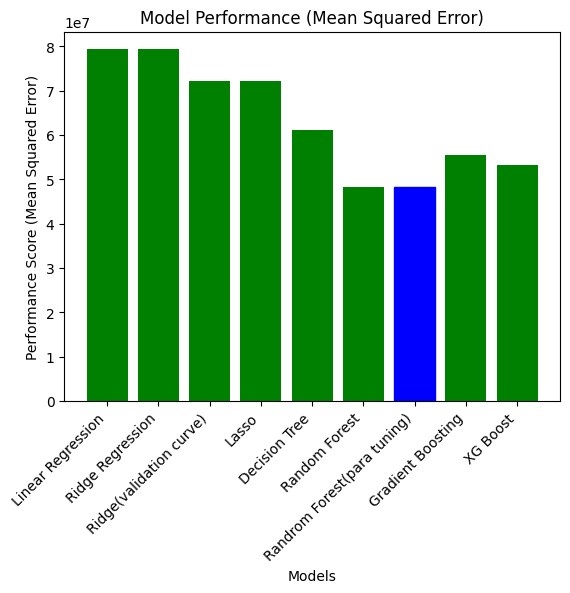

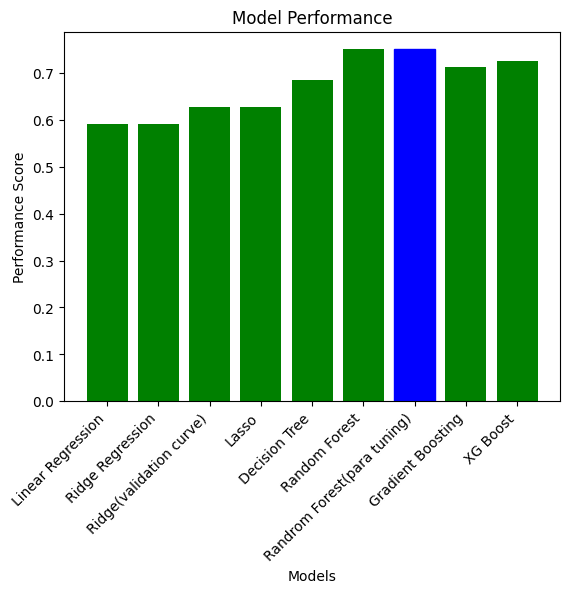

In [566]:
#Creating dictionary for mse value of all model
all_model_mse = {'Linear Regression' : lr_mean_squared_error_test,
                'Ridge Regression': lr_r_mean_squared_error_test,
                'Ridge(validation curve)': lr_r_best_mse_test,
                'Lasso': lr_l_mse_test,
                'Decision Tree': regtree_mse_test,
                'Random Forest': rf_mse_test,
                'Randrom Forest(para tuning)': cvrf_mse_test,
                'Gradient Boosting': gbc_mse_test,
                'XG Boost': xgb_mse_test}

#Creating dictionary for r2 scores of all model
all_model_r2 = {'Linear Regression' : lr_r2score_test,
                'Ridge Regression': lr_r_r2score_test,
                'Ridge(validation curve)': lr_r_best_r2_test,
                'Lasso': lr_l_r2_test,
                'Decision Tree': regtree_r2_test,
                'Random Forest': rf_r2_test,
                'Randrom Forest(para tuning)': cvrf_r2_test,
                'Gradient Boosting': gbc_r2_test,
                'XG Boost': xgb_r2_test}

# Creating lists to find best model
list_r2 = list(all_model_r2.values())
max_list_r2_index = list_r2.index(max(list_r2))

list_mse = list(all_model_mse.values())
min_list_mse_index = list_mse.index(min(list_mse))

# Plotting Bar Graphs to represent the results of all models
bar = plt.bar(all_model_mse.keys(), all_model_mse.values(), color='green')
bar[min_list_mse_index].set_color('Blue')
plt.xlabel('Models')
plt.ylabel('Performance Score (Mean Squared Error)')
plt.title('Model Performance (Mean Squared Error)')
plt.xticks(rotation=45, ha='right')
plt.show()

bars = plt.bar(all_model_r2.keys(), all_model_r2.values(), color='green')
bars[max_list_r2_index].set_color('Blue')
plt.xlabel('Models')
plt.ylabel('Performance Score')
plt.title('Model Performance')
plt.xticks(rotation=45, ha='right')
plt.show()



### Got Best Result by Random Forest with Para tuning with mse value of 48246182.73545651 and r2 score of 0.7509198673038386 So I am choosing this model.

### 1. Your views about the problem statement?
The problem statement addresses the need to develop a model for predicting the salaries of newly hired employees at TechWorks Consulting. This is crucial for the company's success, Competitive compensation plays a significant role in attracting and retaining top talent. By using machine learning techniques, the company aims to automate and improve the salary determination process, considering various factors such as college reputation, city type, previous salary, and experience level. Providing fair compensation to employees is must needed thing to enhances the company's ability to meet client needs and maintain its competitive edge in the industry. The ultimate goal is to develop a model that accurately predicts salaries.

### 2. What will be your approach to solving this task?
To solve this task, I would start by looking closely at the data provided to understand what information we have and what might affect an employee's salary. Then, I would clean up the data, making sure it's all in a format that our models can understand. Once I have a good understanding of the data, I'd choose a model to use for prediction, I'd train the model using the cleaned-up data and then test how well it works using data. If it performs well, great! If not, I'd try adjusting the model or trying a different one until we find something that works. Finally, once we have a model that predicts salaries accurately, we can start using it to help TechWorks Consulting determine fair salaries for their new employees.

### 3. What were the available ML model options you had to perform this task?
* Linear Regression 

* Ridge Regression(validation curve)

* Lasso Regression

* Decision Tree

* Random Forest

* Gradient Boosting

* XG Boost

### 4. Which model’s performance is best and what could be the possible reason for that?
The Random Forest model with para tuning worked the best for predicting employee salaries. However, I got slight difference with para tuning but there is a differce so that why I am choosing this model and there are some other points why i am choosing this model, Each tree looks at different parts of the data to guess about the salary. Also, Random Forest is really good at handling different types of information, like where someone went to college or what city they live in. It's like it can understand all the different factors that might affect someone's salary. Plus, it's really good at dealing with messy data or weird things in the data that might throw off other models. So, understanding of different factors, and ability to handle tricky data, Random Forest ended up being the best at predicting salaries for us.

### 5. What steps can you take to improve this selected model’s performance even further?
To improve further the performance of model we can do the following:
* We can do Hyperparameter tuning with more options.
* We can transform the features to improve the performance.
* Performance can also be improved by getting some more features.

### Thankyou